# Proyecto

## Parte 2 (Deployment , inferencia y predicción) 

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import graphviz
from sklearn.externals import joblib
import pandas as pd
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from sklearn import tree
from scipy import stats

In [2]:
def predecir_modelo_regresion_logistica(x, w):
    logits = np.matmul(x, w)
    yHat = ((1 / (1 + np.exp(-logits))) > 0.5)*1.0
    return yHat 

In [3]:
def Ensemble(X,arbol):
    valXPlusB = np.column_stack((np.ones(X.shape[0]), X))
    svmModel = joblib.load("modeloSVM.pkl")
    desicionTreeModel = joblib.load("modeloDecisionTree.pkl")
    if (arbol==True):
        plt.figure(figsize=(20,10))
        tree.plot_tree(desicionTreeModel, filled=True)
        plt.show()
    
    logisticalRegression = np.load("modeloLogisticRegression.npz")
    w = logisticalRegression['w']
    naiveBayesModel = joblib.load("modeloNaiveBayes.pkl")
    yHat_SVM = svmModel.predict(X)
    yHat_desicionTree = desicionTreeModel.predict(X)
    yHat_logisticalRegression = predecir_modelo_regresion_logistica(valXPlusB, w)
    yHat_naiveBayes = naiveBayesModel.predict(X)
    yHats = np.column_stack((yHat_SVM,yHat_desicionTree,yHat_logisticalRegression,yHat_naiveBayes))
    yHat, _ = stats.mode(yHats, axis = 1)
    return yHat, yHats

### Cargando datos de prueba y validando

In [4]:
data = np.load("testDataSet.npz")
testX = data['testX']
testY = data['testY']

### Prediciendo una observación

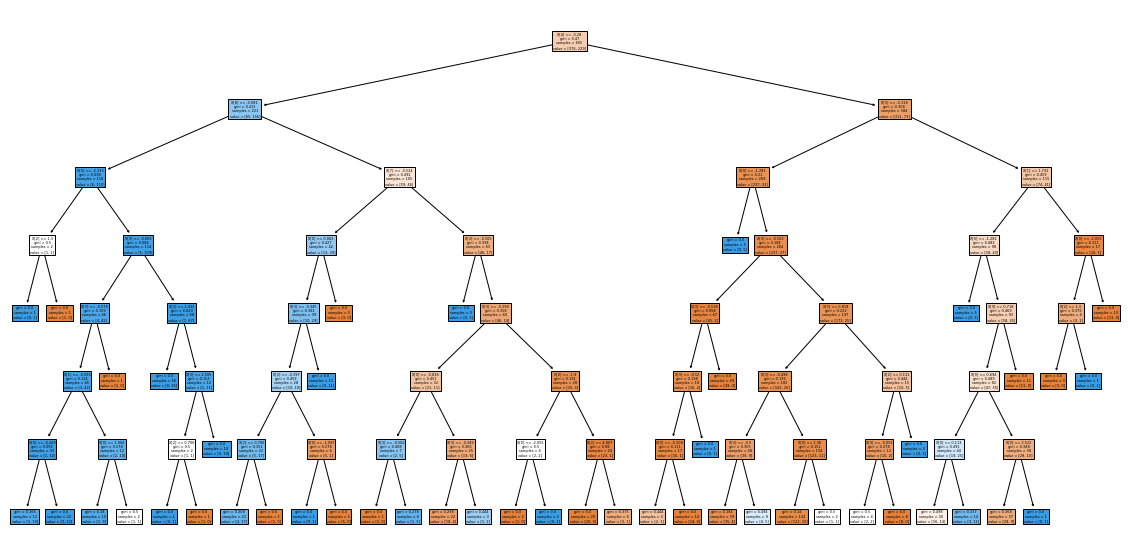

,svmModel,desicionTreeModel Tree,logisticalRegression Logistica,naiveBayesModel,Sobrevive (predicción),Sobrevive (Valor real)
0,0.0,0.0,1.0,1.0,0.0,0.0


In [5]:
X = testX[100:101,:]
Y = testY[100:101]

scaler = StandardScaler()
X = scaler.fit_transform(X)

yHatTest, yHatsTest = Ensemble(X,True)
EnsembleResultsTest = pd.DataFrame(np.column_stack((yHatsTest, yHatTest, Y)), 
             columns=["svmModel", "desicionTreeModel Tree","logisticalRegression Logistica","naiveBayesModel", "Sobrevive (predicción)", "Sobrevive (Valor real)"])
EnsembleResultsTest

### Prediciendo varias observaciones

In [6]:
X = testX[100:111,:]
Y = testY[100:111]

scaler = StandardScaler()
X = scaler.fit_transform(X)

yHatTest, yHatsTest = Ensemble(X,False)
EnsembleResultsTest = pd.DataFrame(np.column_stack((yHatsTest, yHatTest, Y)), 
             columns=["svmModel", "desicionTreeModel Tree","logisticalRegression Logistica","naiveBayesModel", "Sobrevive (predicción)", "Sobrevive (Valor real)"])
EnsembleResultsTest

,svmModel,desicionTreeModel Tree,logisticalRegression Logistica,naiveBayesModel,Sobrevive (predicción),Sobrevive (Valor real)
0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0
5,0.0,0.0,1.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


## Accurrancy del modelo

In [7]:
#Accurrancy
mt.accuracy_score(Y, yHatTest)

0.8181818181818182